# Temperature Prediction Based on Historic Data
This notebook demonstrates a simple temperature prediction using the Global Land Temperatures dataset.

We will:
- Load and preprocess the dataset
- Use lag features to create a simple predictive model
- Train a linear regression model
- Visualize the prediction results

In [1]:
# Step 1: Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Step 2: Load the Dataset (Kaggle: Global Land Temperatures)
url = 'https://raw.githubusercontent.com/datasets/global-temp/master/data/monthly.csv'
data = pd.read_csv(url)

In [3]:
# Step 3: Data Preprocessing
# Filter to relevant columns and convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date', 'Mean']]

# Fill missing values using forward fill (if any)
data.fillna(method='ffill', inplace=True)

<ipython-input-3-4a12e1013cee>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [4]:
# Step 4: Feature Engineering - Create lag features
# Create a lag of 2 minutes (for simplicity, we'll do it for months)
data['Temp_Lag_1'] = data['Mean'].shift(1)
data['Temp_Lag_2'] = data['Mean'].shift(2)

# Drop NaN values caused by shifting
data.dropna(inplace=True)

In [5]:
# Step 5: Train-Test Split
X = data[['Temp_Lag_1', 'Temp_Lag_2']]
y = data['Mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
# Step 6: Train a Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Step 7: Make Predictions
y_pred = model.predict(X_test)

In [8]:
# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.10270707797045098


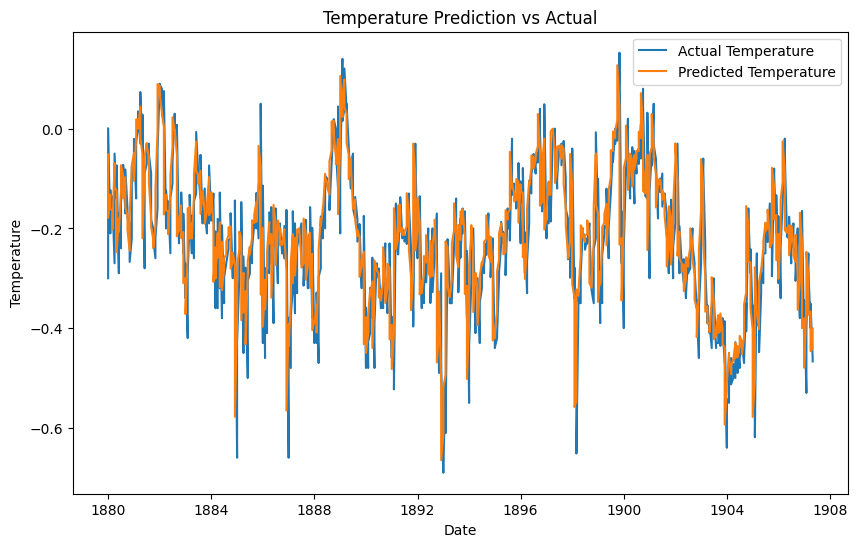

In [9]:
# Step 9: Visualize the Results
plt.figure(figsize=(10,6))
plt.plot(data['Date'].iloc[-len(y_test):], y_test, label='Actual Temperature')
plt.plot(data['Date'].iloc[-len(y_test):], y_pred, label='Predicted Temperature')
plt.title('Temperature Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()